In [143]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

plt.rcParams.update({'font.size': 18})

In [144]:
ckpt_path = './exp_2'    # path to the checkpoint to be evaluated

with open(os.path.join(ckpt_path, 'results.pkl'), 'rb') as f:
    results = pickle.load(f)

In [145]:
results[-1]

{'meta': {'step_in_epoch': 1,
  'epoch': 42.00032,
  'wall_time': 1702577076.8187673},
 'train': {'loss': 3.7315261363983154,
  'top1': 0.3125,
  'top5': 0.3125,
  'learning_rate': 0.0010000000000000002,
  'dur': 0.3625936508178711,
  'data_load_dur': nan},
 'val': {'loss': 3.9254153993606566,
  'top1': 0.105,
  'top5': 0.2981,
  'dur': 0.10665425720214844}}

In [146]:
len(results)

43

Best Training Accuracy: 0.3125 at Epoch: 42
Best Validation Accuracy: 0.1153 at Epoch: 41


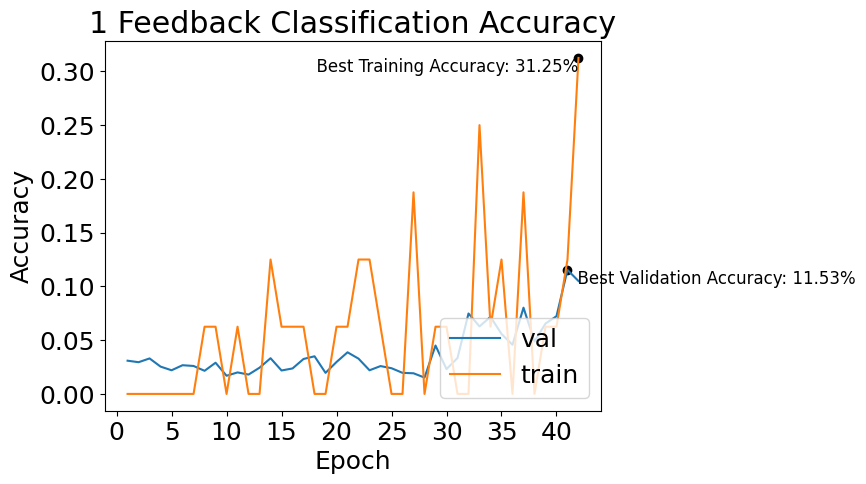

In [147]:
val_top1_accs = [results[i]['val']['top1'] for i in range(len(results))][1:]
train_top1_accs = [results[i]['train']['top1'] for i in range(len(results))][1:]
epochs = [i for i in range(0, len(results))][1:]

# Find the epoch with the highest validation accuracy
best_val_epoch = epochs[val_top1_accs.index(max(val_top1_accs))]
best_val_acc = max(val_top1_accs)

# Find the epoch with the highest training accuracy
best_train_epoch = epochs[train_top1_accs.index(max(train_top1_accs))]
best_train_acc = max(train_top1_accs)

# Print the maximum accuracies and corresponding epochs
print("Best Training Accuracy:", best_train_acc, "at Epoch:", best_train_epoch)
print("Best Validation Accuracy:", best_val_acc, "at Epoch:", best_val_epoch)

# Plotting the graph
plt.plot(epochs, val_top1_accs, label='val')
plt.plot(epochs, train_top1_accs, label='train')
plt.scatter([best_val_epoch, best_train_epoch], [best_val_acc, best_train_acc], color='black')
plt.text(best_val_epoch, best_val_acc, f'  Best Validation Accuracy: {best_val_acc*100:.2f}%', verticalalignment='top', horizontalalignment='left', fontsize=12)
plt.text(best_train_epoch, best_train_acc, f'  Best Training Accuracy: {best_train_acc*100:.2f}%', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(0, len(results), 5))
plt.title('1 Feedback Classification Accuracy')  # TODO: Change the graph name here
plt.legend(loc='lower right')
plt.show()
# plt.savefig(os.path.join(ckpt_path, 'val_top1_accs.png')

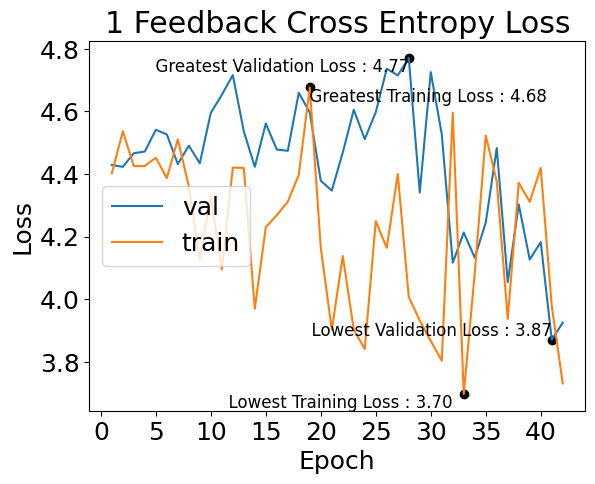

In [153]:
val_loss = [results[i]['val']['loss'] for i in range(0, len(results))][1:]
train_loss = [results[i]['train']['loss'] for i in range(0, len(results))][1:]
epochs = [i for i in range(0, len(results))][1:]
greatest_train_epoch = np.nanargmax(train_loss)
greatest_train_loss = max(train_loss)
lowest_train_epoch = np.nanargmin(train_loss)
lowest_train_loss = min(train_loss)
val_loss_no_nan = [loss for loss in val_loss if not np.isnan(loss)]
if val_loss_no_nan:
    greatest_val_epoch = epochs[val_loss.index(max(val_loss_no_nan))]
    greatest_val_loss = max(val_loss_no_nan)
    lowest_val_epoch = epochs[val_loss.index(min(val_loss_no_nan))]
    lowest_val_loss = min(val_loss_no_nan)
else:
    greatest_val_epoch = greatest_val_loss = lowest_val_epoch = lowest_val_loss = None
plt.plot(epochs, val_loss, label='val')
plt.plot(epochs, train_loss, label='train')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, len(results), 5))
plt.scatter([greatest_train_epoch+1, lowest_train_epoch+1, greatest_val_epoch, lowest_val_epoch], [greatest_train_loss, lowest_train_loss, greatest_val_loss, lowest_val_loss], color='black')
plt.text(greatest_train_epoch, greatest_train_loss, f'  Greatest Training Loss : {greatest_train_loss:.2f}',  verticalalignment='top', horizontalalignment='left', fontsize=12)
plt.text(lowest_train_epoch, lowest_train_loss, f'  Lowest Training Loss : {lowest_train_loss:.2f}', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.text(greatest_val_epoch, greatest_val_loss,  f'  Greatest Validation Loss : {greatest_val_loss:.2f}', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.text(lowest_val_epoch, lowest_val_loss,  f'  Lowest Validation Loss : {lowest_val_loss:.2f}', verticalalignment='bottom', horizontalalignment='right', fontsize=12)
plt.title('1 Feedback Cross Entropy Loss')
plt.legend(loc='center left')
plt.show()
# plt.savefig(os.path.join(ckpt_path, 'val_top1_accs.png'))